In [2]:
import pandas as pd
from sklearn.datasets import load_iris

obj = load_iris()
df = pd.DataFrame(obj.data,columns = obj.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
import seaborn as sns

In [3]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [4]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

<Axes: >

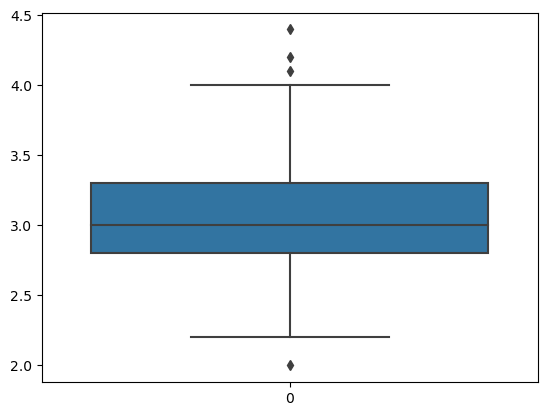

In [8]:
sns.boxplot(df['sepal width (cm)'])

In [9]:
q1 = df['sepal width (cm)'].quantile(0.25)
q2 = df['sepal width (cm)'].quantile(0.50)
q3 = df['sepal width (cm)'].quantile(0.75)

med =  df['sepal width (cm)'].median()

IQR = q3 - q1

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR


print(upper_tail)
print(lower_tail)
print(q1)
print(q2)
print(q3)

4.05
2.05
2.8
3.0
3.3


In [10]:
df['sepal width (cm)'].loc[df['sepal width (cm)']>upper_tail]

15    4.4
32    4.1
33    4.2
Name: sepal width (cm), dtype: float64

In [11]:
df['sepal width (cm)'].loc[df['sepal width (cm)']>upper_tail] = upper_tail

In [12]:
df['sepal width (cm)'].loc[df['sepal width (cm)']>upper_tail]

Series([], Name: sepal width (cm), dtype: float64)

<Axes: >

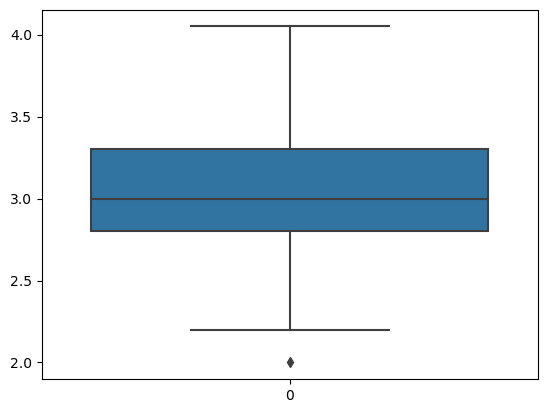

In [13]:
sns.boxplot(df['sepal width (cm)'])

In [17]:
df['sepal width (cm)'].loc[df['sepal width (cm)']<lower_tail]

60    2.0
Name: sepal width (cm), dtype: float64

In [18]:
df['sepal width (cm)'].loc[df['sepal width (cm)']<lower_tail] = lower_tail

In [19]:
df['sepal width (cm)'].loc[df['sepal width (cm)']<lower_tail]

Series([], Name: sepal width (cm), dtype: float64)

In [21]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [25]:
df1 = df.drop('sepal length (cm)',axis = 1)
df1

,sepal width (cm),petal length (cm),petal width (cm)
0,2.05,1.4,0.2
1,2.05,1.4,0.2
2,2.05,1.3,0.2
3,2.05,1.5,0.2
4,2.05,1.4,0.2
...,...,...,...
145,2.05,5.2,2.3
146,2.05,5.0,1.9
147,2.05,5.2,2.0
148,2.05,5.4,2.3


In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
vif_list = []

for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1,i)
    vif_list.append(vif)
    
vif_list

[8.695925299341908, 13.719272754378562, 13.719272754378562]